## Evaluate the selected model on various metrics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

### Load Data, Encoder and Labels Back

In [2]:
data = pickle.load(open("../Saved_Models/data.obj", "rb"))
labels = pickle.load(open("../Saved_Models/labels.obj", "rb"))
encoder = pickle.load(open("../Saved_Models/encoder.obj", "rb"))
data.head()

,zcr,spec_cnt,spec_bw,roll_off,mfcc_9,mfcc_8,mfcc_7,mfcc_6,mfcc_5,mfcc_4,...,mfcc_16,mfcc_15,mfcc_14,mfcc_13,mfcc_12,mfcc_11,mfcc_10,mfcc_1,mfcc_0,chroma
33,0.135866,3262.545498,3046.902288,6828.042045,-1.174001,1.463652,-6.670136,6.109441,-3.211731,15.129221,...,-3.894060,-3.492096,-2.300871,-0.701747,1.880871,-0.740703,-1.208800,59.745834,-112.386246,0.409124
981,0.051222,1451.626880,1920.103350,3046.548245,13.887205,-8.349648,12.752349,-11.798956,16.661285,-6.748015,...,9.418379,13.468802,0.713353,1.415985,-4.319632,2.323283,-4.239411,112.055489,-298.806488,0.201482
443,0.120290,2354.275407,2335.864738,5048.444473,21.509733,-12.836778,24.268114,-7.024291,30.959877,13.205050,...,-7.753410,9.134334,-3.332591,12.768875,-7.443831,12.772383,-13.528785,78.708740,-161.789078,0.428440
440,0.061317,1699.720192,2030.541315,3787.185433,11.156204,-2.366651,17.051825,0.714876,24.681801,-5.101215,...,-4.845382,0.027759,-5.482364,3.515103,-5.682409,6.133347,-3.081421,114.223923,-223.351395,0.458460
114,0.126103,2384.674283,2073.141137,4584.797276,13.375665,-14.652543,23.669445,-8.135880,22.682861,-3.822758,...,-10.719015,1.033077,-11.862719,3.591869,-9.322087,13.716960,-9.416918,91.298286,-120.115761,0.465478


### Load Model

In [3]:
rf = pickle.load(open("../Saved_Models/model.obj", "rb"))

### Score

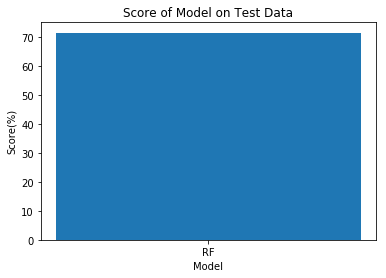

In [4]:
sc = rf.score(pickle.load(open("../Saved_Models/X_test", "rb")),
        pickle.load(open("../Saved_Models/y_actual", "rb")))
plt.bar( ["RF"], [sc * 100],  width='0.35')
plt.ylabel('Score(%)')
plt.title("Score of Model on Test Data")
plt.xlabel('Model');

### K-Fold Cross Validation

In [5]:
from sklearn.model_selection import cross_val_score
n = 10
res = cross_val_score(rf, data, labels, cv=n)
res = [x*100 for x in res]
folds = [ "Fold-"+str(x+1) for x in range(len(res))]


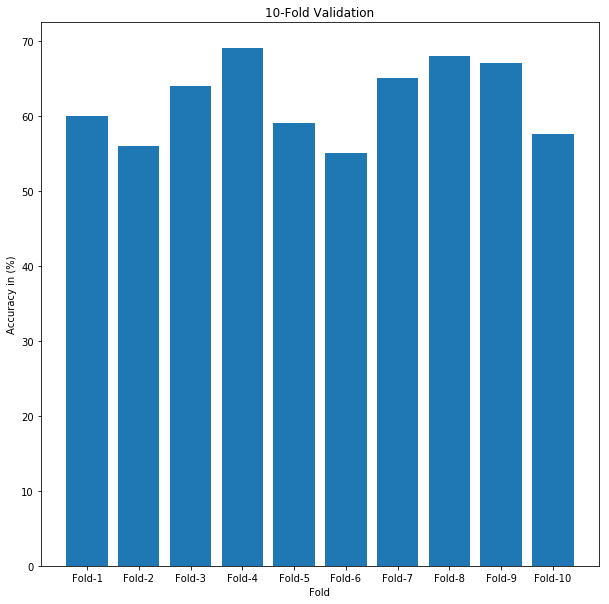

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set(title=str(n)+"-Fold Validation",
      xlabel="Fold",
      ylabel="Accuracy in (%)")
ax.bar(folds, res);

### Confusion Matrix

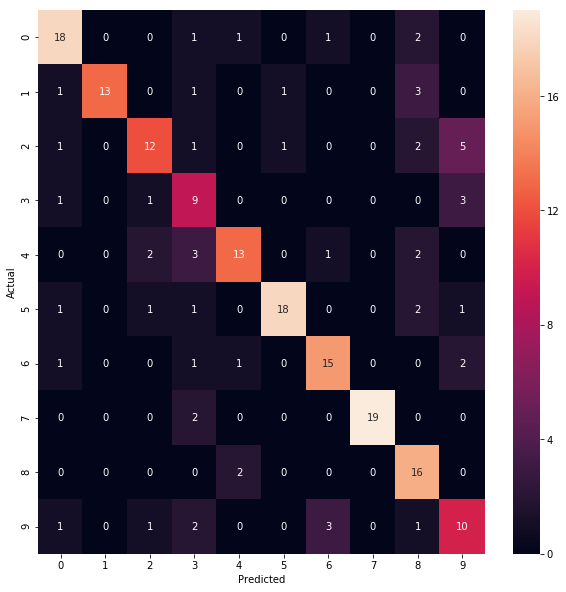

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(pickle.load(open("../Saved_Models/y_pred", "rb")), 
                            pickle.load(open("../Saved_Models/y_actual", "rb")))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=[x for x in range(10)], yticklabels=[x for x in range(10)])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()